In [4]:
from sklearn.svm import SVC
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import sklearn.neighbors as neighbors
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

In [5]:
trainsize=0.7
size=10000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

KNN : scoretest=0.947
KNN : scoretrain=0.9735714285714285
KNN : Recall=0.9449076867581091
[[311   0   0   0   0   0   3   0   0   0]
 [  0 372   1   0   0   0   1   0   0   2]
 [  9  10 278   0   0   0   1   8   1   0]
 [  0   3   4 252   0   4   0   4   1   2]
 [  0   0   0   0 271   0   2   0   0  13]
 [  2   2   1   9   2 251   3   1   1   5]
 [  3   0   0   0   0   2 273   0   0   0]
 [  1   3   1   0   1   0   0 303   0   8]
 [  0   8   3   8   2   2   2   0 238   7]
 [  0   0   1   4   3   2   0   2   1 292]]
ANN : scoretest=0.929
ANN : scoretrain=0.9947142857142857
ANN : Recall=0.9274636656899791
[[309   0   0   0   0   2   2   0   1   0]
 [  0 362   1   1   3   3   1   2   2   1]
 [  1   3 277   3   1   2   1   3  13   3]
 [  2   0   5 232   0   2   1   1  24   3]
 [  1   1   2   3 270   0   2   0   0   7]
 [  3   2   0   5   0 244   1   1  17   4]
 [  6   0   0   0   2   1 268   0   1   0]
 [  2   4   2   1   2   0   1 290   1  14]
 [  0   1   3   1   0   4   3   0 255   3]
 [

TypeError: 'Text' object is not callable

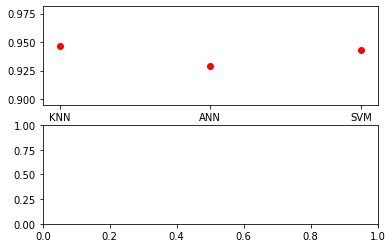

In [9]:
scoreTest=[]
scoreTrain=[]
times=[]
Rec=[]
# KNN
start=time.time()
clfK = neighbors.KNeighborsClassifier(3,n_jobs=-1,p=3)
clfK.fit(xtrain, ytrain)
tempscore=clfK.score(xtest,ytest)
scoreTest.append(tempscore)
print("KNN : scoretest="+str(tempscore))
tempscore=clfK.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("KNN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfK.predict(xtest),average='macro')
Rec.append(temprec)
print("KNN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfK.predict(xtest)))
# ANN
start=time.time()
clfA = nn.MLPClassifier(hidden_layer_sizes=(50,)*20,solver='adam',alpha=0.3)
clfA.fit(xtrain, ytrain)
tempscore=clfA.score(xtest,ytest)
scoreTest.append(tempscore)
print("ANN : scoretest="+str(tempscore))
tempscore=clfA.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("ANN : scoretrain="+str(tempscore))
temprec=metrics.recall_score(ytest,clfA.predict(xtest),average='macro')
Rec.append(temprec)
print("ANN : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfA.predict(xtest)))
# SVM
start=time.time()
clfS = SVC(kernel='poly',gamma='scale',C=1)
clfS.fit(xtrain, ytrain)
tempscore=clfS.score(xtest,ytest)
scoreTest.append(tempscore)
print("SVM : scoretest="+str(tempscore))
tempscore=clfS.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("SVM : scoretrain="+str(tempscore))

temprec=metrics.recall_score(ytest,clfS.predict(xtest),average='macro')
Rec.append(temprec)
print("SVM : Recall="+str(temprec))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clfS.predict(xtest)))


recallK=metrics.recall_score(ytest,clfK.predict(xtest),average=None)
recallA=metrics.recall_score(ytest,clfK.predict(xtest),average=None)
recallS=metrics.recall_score(ytest,clfS.predict(xtest),average=None)

precisionK=metrics.precision_score(ytest,clfK.predict(xtest),average=None)
precisionA=metrics.precision_score(ytest,clfA.predict(xtest),average=None)
precisionS=metrics.precision_score(ytest,clfS.predict(xtest),average=None)

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(('KNN','ANN','SVM'),scoreTest,c='r',label='Test')
ax1.set_title("Precisions & Exectime / methode")
ax1.set_ylabel("Precisions")
ax1.scatter(('KNN','ANN','SVM'),scoreTrain,c='b',label='Train')
ax1.legend(loc='upper left',bbox_to_anchor=(1,0.5))

ax2.scatter(('KNN','ANN','SVM'),times)
ax2.set_xlabel("Methode")
ax2.set_ylabel("Exectime(s)")

fig2, (ax3, ax4) = plt.subplots(nrows=2, ncols=1)
ax3.plot(range(0,10),recallK,c='r')
ax3.plot(range(0,10),recallA,c='b')
ax3.plot(range(0,10),recallS,c='g')
ax3.scatter(range(0,10),recallK,c='r',label="KNN")
ax3.scatter(range(0,10),recallA,c='b',label="ANN")
ax3.scatter(range(0,10),recallS,c='g',label="SVM")
ax3.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax3.set_title("Recall & Précision / Number")
ax3.set_ylabel("Recall")

ax4.plot(range(0,10),precisionK,c='r')
ax4.plot(range(0,10),precisionA,c='b')
ax4.plot(range(0,10),precisionS,c='g')
ax4.scatter(range(0,10),precisionK,c='r',label="KNN")
ax4.scatter(range(0,10),precisionA,c='b',label="ANN")
ax4.scatter(range(0,10),precisionS,c='g',label="SVM")
ax4.legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax4.set_xlabel("Numbers")
ax4.set_ylabel("Precision")

Text(0, 0.5, 'Precision')

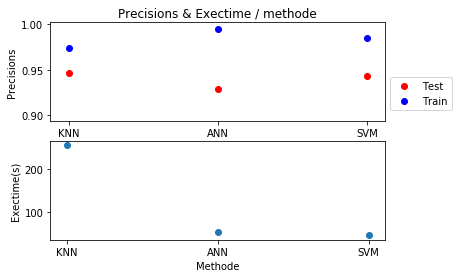

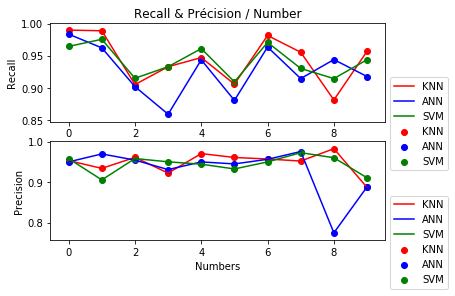